# CogSci and AI Assignment 3
Guneesh Vats <br>
2021122007


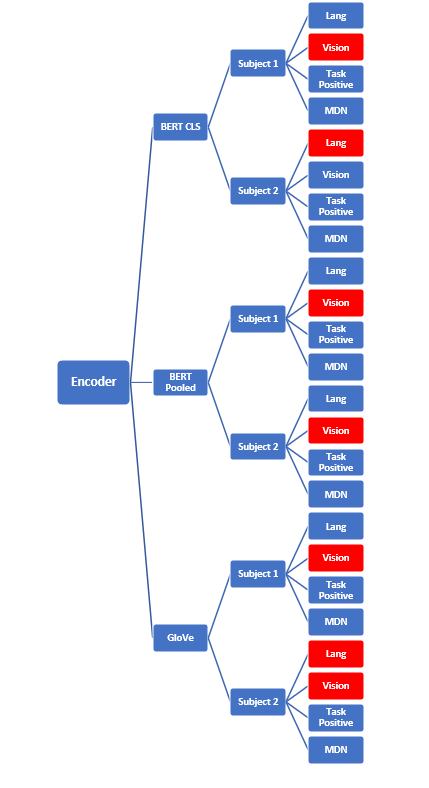

This is how the code is structured for bith encoders and decoders



In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 59.0 MB/s eta 0:00:00


In [288]:
# importing libraries
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from vega_datasets import data
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from IPython.display import clear_output
from scipy.spatial import distance

# Encoders

## Sentence Representations

### BERT/RoBERTa CLS representation

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Load the sentences from the stimuli file
with open("stimuli.txt", "r") as f:
    sentences = [line.strip() for line in f]

In [ ]:
bert_cls_embeddings = []

In [ ]:
for sentence in sentences:
    # Get the BERT token IDs and attention mask
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True)
    token_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    # Get the BERT outputs
    with torch.no_grad():
        outputs = model(token_ids, attention_mask=attention_mask)

    # Get the CLS and pooled embeddings
    cls_embedding = outputs.last_hidden_state[0][0].numpy()
    bert_cls_embeddings.append(cls_embedding)

# Convert the embeddings to numpy arrays
bert_cls_embeddings = np.array(bert_cls_embeddings)

In [ ]:
bert_cls_embeddings.shape

(627, 768)

In [ ]:
np.save('bert_cls_embeddings',bert_cls_embeddings)

### BERT/RoBERTa Pooled representation

In [4]:
# Load the sentences from the stimuli file
with open("/content/drive/MyDrive/CSAI assignment 3/stimuli.txt", "r") as f:
    sentences = [line.strip() for line in f]

In [8]:
# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
bert_pooled_embeddings = []
for sentence in sentences:
    # Get the BERT token IDs and attention mask
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True)
    token_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    # Get the BERT outputs
    with torch.no_grad():
        outputs = model(token_ids, attention_mask=attention_mask)

    # Get the pooled embeddings
    pooled_embedding = outputs.pooler_output[0].numpy()
    bert_pooled_embeddings.append(pooled_embedding)

bert_pooled_embeddings = np.array(bert_pooled_embeddings)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [10]:
bert_pooled_embeddings.shape

(627, 768)

In [11]:
np.save('bert_pooled_embeddings',bert_pooled_embeddings)

### GloVe representation

In [12]:
# Load the GloVe embeddings
glove_file = "/content/drive/MyDrive/CSAI assignment 3/glove.6B.300d.txt"
glove_embeddings = {}
with open(glove_file, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

In [13]:
glove_embeddings_list = []
for sentence in sentences:
    # Get the GloVe embeddings and compute the average
    words = sentence.lower().split()
    glove_sentence_embedding = np.zeros((300,))
    for word in words:
        if word in glove_embeddings:
            glove_sentence_embedding += glove_embeddings[word]
        else:
            glove_sentence_embedding += glove_embeddings['unk']
    glove_sentence_embedding /= len(words)
    glove_embeddings_list.append(glove_sentence_embedding)

# Convert the embeddings to numpy array
glove_embeddings_list = np.array(glove_embeddings_list)

In [14]:
glove_embeddings_list.shape

(627, 300)

In [15]:
np.save('glove_embeddings_list',glove_embeddings_list)

### Load the embeddings

In [22]:
bert_cls_embeddings = np.load('/content/drive/MyDrive/CSAI assignment 3/bert_cls_embeddings.npy')

In [23]:
bert_pooled_embeddings = np.load('/content/drive/MyDrive/CSAI assignment 3/bert_pooled_embeddings.npy')

In [24]:
glove_embeddings = np.load('/content/drive/MyDrive/CSAI assignment 3/glove_embeddings_list.npy')

## Subject 1 cls Encoders

In [25]:
# Load the fMRI data for Subject 1
data_subj1 = np.load("/content/drive/MyDrive/CSAI assignment 3/subj1.npy", allow_pickle=True).item()

### For language ROI

In [27]:
X = bert_cls_embeddings
y = data_subj1['language']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [34]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [37]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [38]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

3053.8555088334156

In [39]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [42]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


0.10724354582009175
0.2861752904931089


In [65]:
def accuracy_2v2(true, pred):
    N = true.shape[0]
    total = 0

    for i in range(true.shape[0] - 1):
        for j in range(i + 1, true.shape[0]):
            if (distance.cosine(true[i], pred[i]) + distance.cosine(true[j], pred[j])) < (distance.cosine(true[i], pred[j]) + distance.cosine(true[j], pred[i])):
                total += 1

    nC2 = (true.shape[0] * (true.shape[0] - 1) / 2)
    acc2v2 = total / nC2
    return acc2v2

def evalPearson(true, pred):
    total = 0

    for i in range(true.shape[0]):
        total += np.corrcoef(true[i], pred[i])

    return total / true.shape[0]

In [67]:
encoder_cls_subj1_lang_2v2 = accuracy_2v2(y_test,ridge_opt_preds)

In [68]:
encoder_cls_subj1_lang_pc = evalPearson(y_test,ridge_opt_preds)

### For vision ROI

In [69]:
X = bert_cls_embeddings
y = data_subj1['vision']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [71]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [72]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [73]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

3053.8555088334156

In [74]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [75]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [76]:
encoder_cls_subj1_vis_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_cls_subj1_vis_2v2

0.8867385268659154

In [86]:
encoder_cls_subj1_vis_pc = evalPearson(y_test,ridge_opt_preds)
encoder_cls_subj1_vis_pc

array([[1.        , 0.63706776],
       [0.63706776, 1.        ]])

### For Task Positive ROI

In [77]:
X = bert_cls_embeddings
y = data_subj1['task']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [79]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [80]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [81]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

4862.601580065353

In [82]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [83]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [84]:
encoder_cls_subj1_task_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_cls_subj1_task_2v2

0.8354564755838642

In [85]:
encoder_cls_subj1_task_pc = evalPearson(y_test,ridge_opt_preds)
encoder_cls_subj1_task_pc

array([[1.        , 0.63706776],
       [0.63706776, 1.        ]])

### For DMN ROI

In [87]:
X = bert_cls_embeddings
y = data_subj1['dmn']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [89]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [90]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [91]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

3853.5285937105273

In [92]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [93]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [94]:
encoder_cls_subj1_dmn_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_cls_subj1_dmn_2v2

0.8229626000326637

In [95]:
encoder_cls_subj1_dmn_pc = evalPearson(y_test,ridge_opt_preds)
encoder_cls_subj1_dmn_pc

array([[1.        , 0.63158792],
       [0.63158792, 1.        ]])

## Subject 2 cls Encoders

In [96]:
# Load the fMRI data for Subject 1
data_subj2 = np.load("/content/drive/MyDrive/CSAI assignment 3/subj2.npy", allow_pickle=True).item()

### For language ROI

In [97]:
X = bert_cls_embeddings
y = data_subj2['language']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [99]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [100]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [101]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

3053.8555088334156

In [102]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [103]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [104]:
encoder_cls_subj2_lang_2v2 = accuracy_2v2(y_test,ridge_opt_preds)

In [105]:
encoder_cls_subj2_lang_pc = evalPearson(y_test,ridge_opt_preds)

### For vision ROI

In [110]:
X = bert_cls_embeddings
y = data_subj2['vision']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [112]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [113]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [114]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

3053.8555088334156

In [115]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [116]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [117]:
encoder_cls_subj2_vis_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_cls_subj2_vis_2v2

0.8391311448636289

In [118]:
encoder_cls_subj2_vis_pc = evalPearson(y_test,ridge_opt_preds)
encoder_cls_subj2_vis_pc

array([[1.        , 0.79461955],
       [0.79461955, 1.        ]])

### For Task Positive ROI

In [119]:
X = bert_cls_embeddings
y = data_subj2['task']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [121]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [122]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [123]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

4862.601580065353

In [124]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [125]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [126]:
encoder_cls_subj2_task_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_cls_subj2_task_2v2

0.7636779356524579

In [127]:
encoder_cls_subj2_task_pc = evalPearson(y_test,ridge_opt_preds)
encoder_cls_subj2_task_pc

array([[1.        , 0.46724314],
       [0.46724314, 1.        ]])

### For DMN ROI

In [128]:
X = bert_cls_embeddings
y = data_subj2['dmn']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [130]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [131]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [132]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

3853.5285937105273

In [133]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [134]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [135]:
encoder_cls_subj2_dmn_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_cls_subj2_dmn_2v2

0.7906255103707333

In [136]:
encoder_cls_subj2_dmn_pc = evalPearson(y_test,ridge_opt_preds)
encoder_cls_subj2_dmn_pc

array([[1.        , 0.52653611],
       [0.52653611, 1.        ]])

## Subject 1 pooled Encoders

In [137]:
# Load the fMRI data for Subject 1
data_subj1 = np.load("/content/drive/MyDrive/CSAI assignment 3/subj1.npy", allow_pickle=True).item()

### For language ROI

In [138]:
X = bert_pooled_embeddings
y = data_subj1['language']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [140]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [141]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [142]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

756.463327554629

In [143]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [144]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [145]:
encoder_pooled_subj1_lang_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_pooled_subj1_lang_2v2

0.8626490282541238

In [146]:
encoder_pooled_subj1_lang_pc = evalPearson(y_test,ridge_opt_preds)
encoder_pooled_subj1_lang_pc

array([[1.        , 0.78968374],
       [0.78968374, 1.        ]])

### For vision ROI

In [147]:
X = bert_pooled_embeddings
y = data_subj1['vision']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [149]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [150]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [151]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

599.4842503189409

In [152]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [153]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [154]:
encoder_pooled_subj1_vis_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_pooled_subj1_vis_2v2

0.8737546954107464

In [155]:
encoder_pooled_subj1_vis_pc = evalPearson(y_test,ridge_opt_preds)
encoder_pooled_subj1_vis_pc

array([[1.        , 0.83098193],
       [0.83098193, 1.        ]])

### For Task Positive ROI

In [156]:
X = bert_pooled_embeddings
y = data_subj1['task']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [158]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [159]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [160]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

1072.2672220103232

In [161]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [162]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [163]:
encoder_pooled_subj1_task_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_pooled_subj1_task_2v2

0.8171647885023681

In [164]:
encoder_pooled_subj1_task_pc = evalPearson(y_test,ridge_opt_preds)
encoder_pooled_subj1_task_pc

array([[1.        , 0.62883057],
       [0.62883057, 1.        ]])

### For DMN ROI

In [165]:
X = bert_pooled_embeddings
y = data_subj1['dmn']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [167]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [168]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [169]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

954.5484566618337

In [170]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [171]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [172]:
encoder_pooled_subj1_dmn_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_pooled_subj1_dmn_2v2

0.7854809733790625

In [173]:
encoder_pooled_subj1_dmn_pc = evalPearson(y_test,ridge_opt_preds)
encoder_pooled_subj1_dmn_pc

array([[1.        , 0.62006586],
       [0.62006586, 1.        ]])

## Subject 2 pooled Encoders

In [174]:
# Load the fMRI data for Subject 1
data_subj2 = np.load("/content/drive/MyDrive/CSAI assignment 3/subj2.npy", allow_pickle=True).item()

### For language ROI

In [175]:
X = bert_pooled_embeddings
y = data_subj2['language']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [177]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [178]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [179]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

599.4842503189409

In [180]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [181]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [182]:
encoder_pooled_subj2_lang_2v2 = accuracy_2v2(y_test,ridge_opt_preds)

In [183]:
encoder_pooled_subj2_lang_pc = evalPearson(y_test,ridge_opt_preds)

### For vision ROI

In [184]:
X = bert_pooled_embeddings
y = data_subj2['vision']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [186]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [187]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [188]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

599.4842503189409

In [189]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [190]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [191]:
encoder_pooled_subj2_vis_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_pooled_subj2_vis_2v2

0.8313735097174587

In [192]:
encoder_pooled_subj2_vis_pc = evalPearson(y_test,ridge_opt_preds)
encoder_pooled_subj2_vis_pc

array([[1.        , 0.78870162],
       [0.78870162, 1.        ]])

### For Task Positive ROI

In [193]:
X = bert_pooled_embeddings
y = data_subj2['task']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [195]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [196]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [197]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

1519.9110829529332

In [198]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [199]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [200]:
encoder_pooled_subj2_task_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_pooled_subj2_task_2v2

0.7351788339049485

In [201]:
encoder_pooled_subj2_task_pc = evalPearson(y_test,ridge_opt_preds)
encoder_pooled_subj2_task_pc

array([[1.        , 0.45434913],
       [0.45434913, 1.        ]])

### For DMN ROI

In [202]:
X = bert_pooled_embeddings
y = data_subj2['dmn']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [204]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [205]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [206]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

954.5484566618337

In [207]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [208]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [209]:
encoder_pooled_subj2_dmn_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_pooled_subj2_dmn_2v2

0.7641678915564266

In [210]:
encoder_pooled_subj2_dmn_pc = evalPearson(y_test,ridge_opt_preds)
encoder_pooled_subj2_dmn_pc

array([[1.        , 0.51513444],
       [0.51513444, 1.        ]])

## Subject 1 glove Encoders

In [211]:
# Load the fMRI data for Subject 1
data_subj1 = np.load("/content/drive/MyDrive/CSAI assignment 3/subj1.npy", allow_pickle=True).item()

### For language ROI

In [212]:
X = glove_embeddings
y = data_subj1['language']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [214]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [215]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [216]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

1519.9110829529332

In [217]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [218]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [219]:
encoder_glove_subj1_lang_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_glove_subj1_lang_2v2

0.8443573411726278

In [220]:
encoder_glove_subj1_lang_pc = evalPearson(y_test,ridge_opt_preds)
encoder_glove_subj1_lang_pc

array([[1.        , 0.78919598],
       [0.78919598, 1.        ]])

### For vision ROI

In [221]:
X = glove_embeddings
y = data_subj1['vision']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [223]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [224]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [225]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

1707.3526474706905

In [226]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [227]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [228]:
encoder_glove_subj1_vis_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_glove_subj1_vis_2v2

0.8499918340682672

In [229]:
encoder_glove_subj1_vis_pc = evalPearson(y_test,ridge_opt_preds)
encoder_glove_subj1_vis_pc

array([[1.        , 0.82765053],
       [0.82765053, 1.        ]])

### For Task Positive ROI

In [230]:
X = glove_embeddings
y = data_subj1['task']

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [232]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [233]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [234]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

1917.9102616724888

In [235]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [236]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [237]:
encoder_glove_subj1_task_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_glove_subj1_task_2v2

0.7882573901682182

In [238]:
encoder_glove_subj1_task_pc = evalPearson(y_test,ridge_opt_preds)
encoder_glove_subj1_task_pc

array([[1.        , 0.62680317],
       [0.62680317, 1.        ]])

### For DMN ROI

In [239]:
X = glove_embeddings
y = data_subj1['dmn']

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [241]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [242]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [243]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

2154.4346900318847

In [244]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [245]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [246]:
encoder_glove_subj1_dmn_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_glove_subj1_dmn_2v2

0.7502858076106483

In [247]:
encoder_glove_subj1_dmn_pc = evalPearson(y_test,ridge_opt_preds)
encoder_glove_subj1_dmn_pc

array([[1.        , 0.61233599],
       [0.61233599, 1.        ]])

## Subject 2 glove Encoders

In [248]:
# Load the fMRI data for Subject 1
data_subj2 = np.load("/content/drive/MyDrive/CSAI assignment 3/subj2.npy", allow_pickle=True).item()

### For language ROI

In [249]:
X = glove_embeddings
y = data_subj2['language']

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [251]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [252]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [253]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

2154.4346900318847

In [254]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [255]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [256]:
encoder_glove_subj2_lang_2v2 = accuracy_2v2(y_test,ridge_opt_preds)

In [257]:
encoder_glove_subj2_lang_pc = evalPearson(y_test,ridge_opt_preds)

### For vision ROI

In [258]:
X = glove_embeddings
y = data_subj2['vision']

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [260]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [261]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [262]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

2154.4346900318847

In [263]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [264]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [265]:
encoder_glove_subj2_vis_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_glove_subj2_vis_2v2

0.8291687081495999

In [266]:
encoder_glove_subj2_vis_pc = evalPearson(y_test,ridge_opt_preds)
encoder_glove_subj2_vis_pc

array([[1.        , 0.79116361],
       [0.79116361, 1.        ]])

### For Task Positive ROI

In [267]:
X = glove_embeddings
y = data_subj2['task']

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [269]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [270]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [271]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

3853.5285937105273

In [272]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [273]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [274]:
encoder_glove_subj2_task_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_glove_subj2_task_2v2

0.7284011105667156

In [275]:
encoder_glove_subj2_task_pc = evalPearson(y_test,ridge_opt_preds)
encoder_glove_subj2_task_pc

array([[1.        , 0.46018111],
       [0.46018111, 1.        ]])

### For DMN ROI

In [276]:
X = glove_embeddings
y = data_subj2['dmn']

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [278]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [279]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [280]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

2718.58824273294

In [281]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [282]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [283]:
encoder_glove_subj2_dmn_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
encoder_glove_subj2_dmn_2v2

0.7361587457128859

In [284]:
encoder_glove_subj2_dmn_pc = evalPearson(y_test,ridge_opt_preds)
encoder_glove_subj2_dmn_pc

array([[1.        , 0.51457068],
       [0.51457068, 1.        ]])

## Encoder Plots

### Subject 1 2v2 Accuracy

In [289]:
encoder_cls_subj1_2v2 = [encoder_cls_subj1_lang_2v2, encoder_cls_subj1_vis_2v2,encoder_cls_subj1_task_2v2,encoder_cls_subj1_dmn_2v2]
encoder_pooled_subj1_2v2 = [encoder_pooled_subj1_lang_2v2, encoder_pooled_subj1_vis_2v2,encoder_pooled_subj1_task_2v2,encoder_pooled_subj1_dmn_2v2]
encoder_glove_subj1_2v2 = [encoder_glove_subj1_lang_2v2, encoder_glove_subj1_vis_2v2,encoder_glove_subj1_task_2v2,encoder_glove_subj1_dmn_2v2]

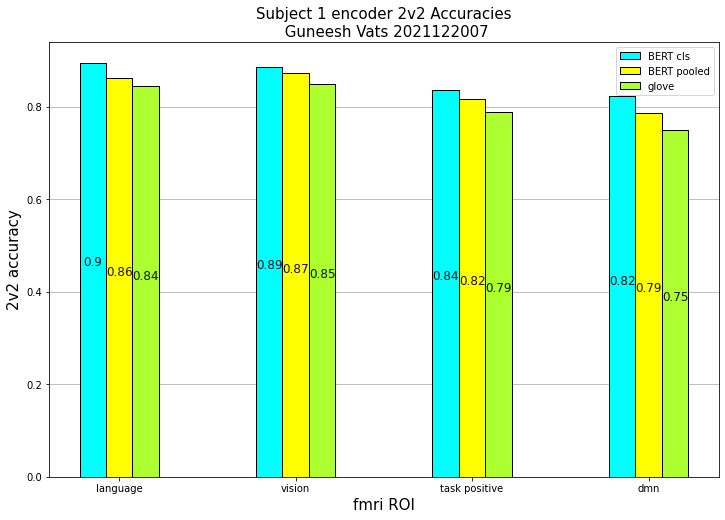

In [290]:
xlabels = ['language','vision','task positive','dmn']
w = 0.15
bar1 = np.arange(len(xlabels))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(bar1, encoder_cls_subj1_2v2, w, label='BERT cls',edgecolor = 'black', color='aqua')
ax.bar(bar2, encoder_pooled_subj1_2v2, w, label='BERT pooled',edgecolor = 'black',color='yellow' )
ax.bar(bar3, encoder_glove_subj1_2v2, w, label='glove',edgecolor = 'black', color='greenyellow')
ax.set_xlabel("fmri ROI",fontsize=15)
ax.set_ylabel("2v2 accuracy",fontsize=15)
ax.set_title("Subject 1 encoder 2v2 Accuracies\n Guneesh Vats 2021122007",fontsize=15)
ax.set_axisbelow(True)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_xticks(bar1+w, xlabels,fontsize=10)
ax.legend()

for bar in ax.patches:
  bar_value = round(bar.get_height(),2)
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value/2
  bar_color = 'black'
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, alpha=.91,
          size=12)

### Subject 2 2v2 Accuracies

In [291]:
encoder_cls_subj2_2v2 = [encoder_cls_subj2_lang_2v2, encoder_cls_subj2_vis_2v2,encoder_cls_subj2_task_2v2,encoder_cls_subj2_dmn_2v2]
encoder_pooled_subj2_2v2 = [encoder_pooled_subj2_lang_2v2, encoder_pooled_subj2_vis_2v2,encoder_pooled_subj2_task_2v2,encoder_pooled_subj2_dmn_2v2]
encoder_glove_subj2_2v2 = [encoder_glove_subj2_lang_2v2, encoder_glove_subj2_vis_2v2,encoder_glove_subj2_task_2v2,encoder_glove_subj2_dmn_2v2]

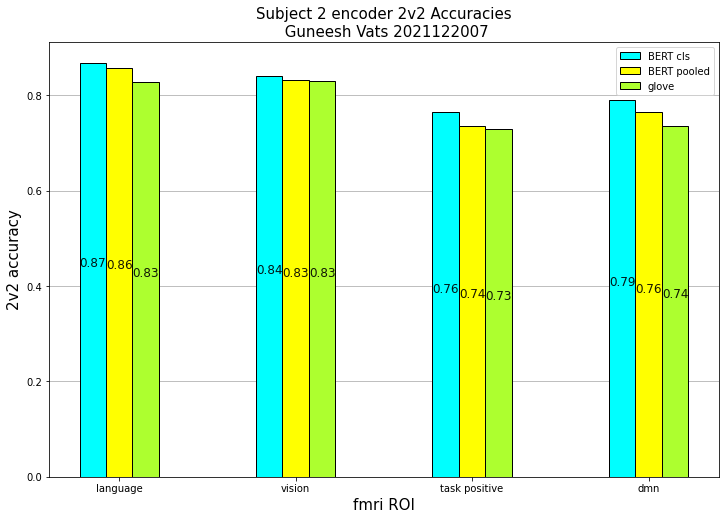

In [292]:
xlabels = ['language','vision','task positive','dmn']
w = 0.15
bar1 = np.arange(len(xlabels))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(bar1, encoder_cls_subj2_2v2, w, label='BERT cls',edgecolor = 'black', color='aqua')
ax.bar(bar2, encoder_pooled_subj2_2v2, w, label='BERT pooled',edgecolor = 'black',color='yellow' )
ax.bar(bar3, encoder_glove_subj2_2v2, w, label='glove',edgecolor = 'black', color='greenyellow')
ax.set_xlabel("fmri ROI",fontsize=15)
ax.set_ylabel("2v2 accuracy",fontsize=15)
ax.set_title("Subject 2 encoder 2v2 Accuracies\n Guneesh Vats 2021122007",fontsize=15)
ax.set_axisbelow(True)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_xticks(bar1+w, xlabels,fontsize=10)
ax.legend()

for bar in ax.patches:
  bar_value = round(bar.get_height(),2)
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value/2
  bar_color = 'black'
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, alpha=.91,
          size=12)

### Subject 1 Pearson's Correlation

In [293]:
encoder_cls_subj1_pc = [encoder_cls_subj1_lang_pc[1][0], encoder_cls_subj1_vis_pc[1][0],encoder_cls_subj1_task_pc[1][0],encoder_cls_subj1_dmn_pc[1][0]]
encoder_pooled_subj1_pc = [encoder_pooled_subj1_lang_pc[1][0], encoder_pooled_subj1_vis_pc[1][0],encoder_pooled_subj1_task_pc[1][0],encoder_pooled_subj1_dmn_pc[1][0]]
encoder_glove_subj1_pc = [encoder_glove_subj1_lang_pc[1][0], encoder_glove_subj1_vis_pc[1][0],encoder_glove_subj1_task_pc[1][0],encoder_glove_subj1_dmn_pc[1][0]]

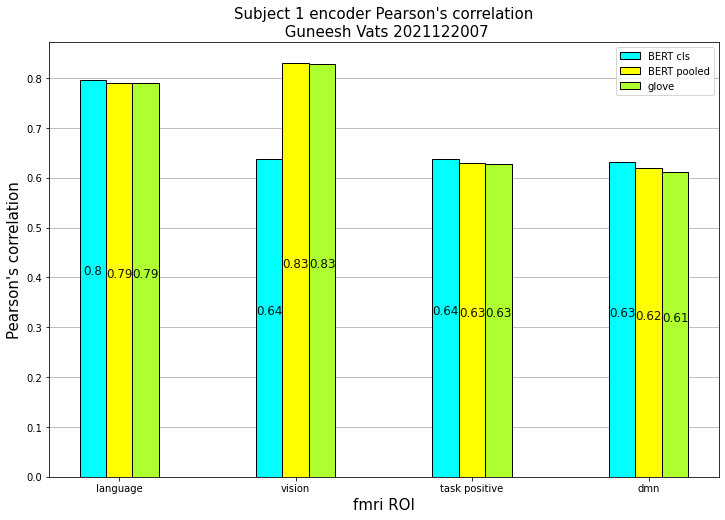

In [294]:
xlabels = ['language','vision','task positive','dmn']
w = 0.15
bar1 = np.arange(len(xlabels))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(bar1, encoder_cls_subj1_pc, w, label='BERT cls',edgecolor = 'black', color='aqua')
ax.bar(bar2, encoder_pooled_subj1_pc, w, label='BERT pooled',edgecolor = 'black',color='yellow' )
ax.bar(bar3, encoder_glove_subj1_pc, w, label='glove',edgecolor = 'black', color='greenyellow')
ax.set_xlabel("fmri ROI",fontsize=15)
ax.set_ylabel("Pearson's correlation",fontsize=15)
ax.set_title("Subject 1 encoder Pearson's correlation\n Guneesh Vats 2021122007",fontsize=15)
ax.set_axisbelow(True)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_xticks(bar1+w, xlabels,fontsize=10)
ax.legend()

for bar in ax.patches:
  bar_value = round(bar.get_height(),2)
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value/2
  bar_color = 'black'
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, alpha=.91,
          size=12)

### Subject 2 Pearson's Correlations

In [295]:
encoder_cls_subj2_pc = [encoder_cls_subj2_lang_pc[1][0], encoder_cls_subj2_vis_pc[1][0],encoder_cls_subj2_task_pc[1][0],encoder_cls_subj2_dmn_pc[1][0]]
encoder_pooled_subj2_pc = [encoder_pooled_subj2_lang_pc[1][0], encoder_pooled_subj2_vis_pc[1][0],encoder_pooled_subj2_task_pc[1][0],encoder_pooled_subj2_dmn_pc[1][0]]
encoder_glove_subj2_pc = [encoder_glove_subj2_lang_pc[1][0], encoder_glove_subj2_vis_pc[1][0],encoder_glove_subj2_task_pc[1][0],encoder_glove_subj2_dmn_pc[1][0]]

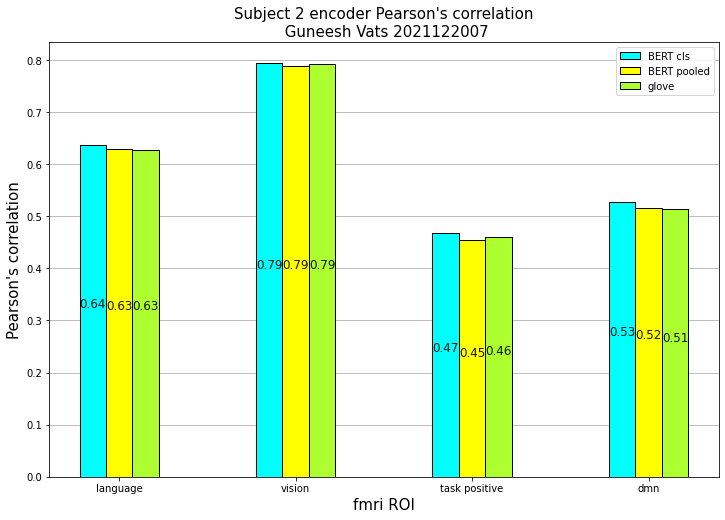

In [296]:
xlabels = ['language','vision','task positive','dmn']
w = 0.15
bar1 = np.arange(len(xlabels))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(bar1, encoder_cls_subj2_pc, w, label='BERT cls',edgecolor = 'black', color='aqua')
ax.bar(bar2, encoder_pooled_subj2_pc, w, label='BERT pooled',edgecolor = 'black',color='yellow' )
ax.bar(bar3, encoder_glove_subj2_pc, w, label='glove',edgecolor = 'black', color='greenyellow')
ax.set_xlabel("fmri ROI",fontsize=15)
ax.set_ylabel("Pearson's correlation",fontsize=15)
ax.set_title("Subject 2 encoder Pearson's correlation\n Guneesh Vats 2021122007",fontsize=15)
ax.set_axisbelow(True)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_xticks(bar1+w, xlabels,fontsize=10)
ax.legend()

for bar in ax.patches:
  bar_value = round(bar.get_height(),2)
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value/2
  bar_color = 'black'
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, alpha=.91,
          size=12)

# Decoders

## Subject 1 cls Decoders

In [ ]:
# Load the fMRI data for Subject 1
data_subj1 = np.load("/content/drive/MyDrive/CSAI assignment 3/subj1.npy", allow_pickle=True).item()

### For language ROI

In [ ]:
X = data_subj1['language']
y = bert_cls_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

13848.863713938717

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
def accuracy_2v2(true, pred):
    N = true.shape[0]
    total = 0

    for i in range(true.shape[0] - 1):
        for j in range(i + 1, true.shape[0]):
            if (distance.cosine(true[i], pred[i]) + distance.cosine(true[j], pred[j])) < (distance.cosine(true[i], pred[j]) + distance.cosine(true[j], pred[i])):
                total += 1

    nC2 = (true.shape[0] * (true.shape[0] - 1) / 2)
    acc2v2 = total / nC2
    return acc2v2

def evalPearson(true, pred):
    total = 0

    for i in range(true.shape[0]):
        total += np.corrcoef(true[i], pred[i])

    return total / true.shape[0]

In [ ]:
decoder_cls_subj1_lang_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_cls_subj1_lang_2v2

0.9688061407806631

In [ ]:
decoder_cls_subj1_lang_pc = evalPearson(y_test,ridge_opt_preds)
decoder_cls_subj1_lang_pc

array([[1.        , 0.88013541],
       [0.88013541, 1.        ]])

### For vision ROI

In [ ]:
X = data_subj1['vision']
y = bert_cls_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

35111.917342151275

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_cls_subj1_vis_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_cls_subj1_vis_2v2

0.9714192389351625

In [ ]:
decoder_cls_subj1_vis_pc = evalPearson(y_test,ridge_opt_preds)
decoder_cls_subj1_vis_pc

array([[1.        , 0.88070387],
       [0.88070387, 1.        ]])

### For Task Positive ROI

In [ ]:
X = data_subj1['task']
y = bert_cls_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

31257.15849688235

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_cls_subj1_task_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_cls_subj1_task_2v2

0.9639882410583047

In [ ]:
decoder_cls_subj1_task_pc = evalPearson(y_test,ridge_opt_preds)
decoder_cls_subj1_task_pc

array([[1.       , 0.8791832],
       [0.8791832, 1.       ]])

### For DMN ROI

In [ ]:
X = data_subj1['dmn']
y = bert_cls_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

13848.863713938717

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_cls_subj1_dmn_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_cls_subj1_dmn_2v2

0.9579454515760248

In [ ]:
decoder_cls_subj1_dmn_pc = evalPearson(y_test,ridge_opt_preds)
decoder_cls_subj1_dmn_pc

array([[1.        , 0.87911726],
       [0.87911726, 1.        ]])

## Subject 2 cls Decoders

In [ ]:
# Load the fMRI data for Subject 1
data_subj2 = np.load("/content/drive/MyDrive/CSAI assignment 3/subj2.npy", allow_pickle=True).item()

### For language ROI

In [ ]:
X = data_subj2['language']
y = bert_cls_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

9770.099572992247

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_cls_subj2_lang_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_cls_subj2_lang_2v2

0.9617834394904459

In [ ]:
decoder_cls_subj2_lang_pc = evalPearson(y_test,ridge_opt_preds)
decoder_cls_subj2_lang_pc

array([[1.        , 0.87627184],
       [0.87627184, 1.        ]])

### For vision ROI

In [ ]:
X = data_subj2['vision']
y = bert_cls_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

35111.917342151275

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_cls_subj2_vis_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_cls_subj2_vis_2v2

0.9554956720561816

In [ ]:
decoder_cls_subj2_vis_pc = evalPearson(y_test,ridge_opt_preds)
decoder_cls_subj2_vis_pc

array([[1.        , 0.87590729],
       [0.87590729, 1.        ]])

### For Task Positive ROI

In [ ]:
X = data_subj2['task']
y = bert_cls_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

22051.307399030455

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_cls_subj2_task_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_cls_subj2_task_2v2

0.9554140127388535

In [ ]:
decoder_cls_subj2_task_pc = evalPearson(y_test,ridge_opt_preds)
decoder_cls_subj2_task_pc

array([[1.        , 0.87443773],
       [0.87443773, 1.        ]])

### For DMN ROI

In [ ]:
X = data_subj2['dmn']
y = bert_cls_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

12328.467394420659

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_cls_subj2_dmn_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_cls_subj2_dmn_2v2

0.9632533072023518

In [ ]:
decoder_cls_subj2_dmn_pc = evalPearson(y_test,ridge_opt_preds)
decoder_cls_subj2_dmn_pc

array([[1.        , 0.87527826],
       [0.87527826, 1.        ]])

## Subject 1 pooled Decoders

In [ ]:
# Load the fMRI data for Subject 1
data_subj1 = np.load("/content/drive/MyDrive/CSAI assignment 3/subj1.npy", allow_pickle=True).item()

### For language ROI

In [ ]:
X = data_subj1['language']
y = bert_pooled_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

17475.28400007683

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_pooled_subj1_lang_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_pooled_subj1_lang_2v2

0.782051282051282

In [ ]:
decoder_pooled_subj1_lang_pc = evalPearson(y_test,ridge_opt_preds)
decoder_pooled_subj1_lang_pc

array([[1.        , 0.92066354],
       [0.92066354, 1.        ]])

### For vision ROI

In [ ]:
X = data_subj1['vision']
y = bert_pooled_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

31257.15849688235

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_pooled_subj1_vis_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_pooled_subj1_vis_2v2

0.7999346725461375

In [ ]:
decoder_pooled_subj1_vis_pc = evalPearson(y_test,ridge_opt_preds)
decoder_pooled_subj1_vis_pc

array([[1.       , 0.9214617],
       [0.9214617, 1.       ]])

### For Task Positive ROI

In [ ]:
X = data_subj1['task']
y = bert_pooled_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

24770.76355991709

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_pooled_subj1_task_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_pooled_subj1_task_2v2

0.7583700800261309

In [ ]:
decoder_pooled_subj1_task_pc = evalPearson(y_test,ridge_opt_preds)
decoder_pooled_subj1_task_pc

array([[1.        , 0.91876317],
       [0.91876317, 1.        ]])

### For DMN ROI

In [ ]:
X = data_subj1['dmn']
y = bert_pooled_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

7742.63682681127

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_pooled_subj1_dmn_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_pooled_subj1_dmn_2v2

0.7763351298383145

In [ ]:
decoder_pooled_subj1_dmn_pc = evalPearson(y_test,ridge_opt_preds)
decoder_pooled_subj1_dmn_pc

array([[1.       , 0.9203293],
       [0.9203293, 1.       ]])

## Subject 2 pooled Decoders

In [ ]:
# Load the fMRI data for Subject 1
data_subj2 = np.load("/content/drive/MyDrive/CSAI assignment 3/subj2.npy", allow_pickle=True).item()

### For language ROI

In [ ]:
X = data_subj2['language']
y = bert_pooled_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

27825.59402207126

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_pooled_subj2_lang_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_pooled_subj2_lang_2v2

0.7245631226522946

In [ ]:
decoder_pooled_subj2_lang_pc = evalPearson(y_test,ridge_opt_preds)
decoder_pooled_subj2_lang_pc

array([[1.        , 0.91271422],
       [0.91271422, 1.        ]])

### For vision ROI

In [ ]:
X = data_subj2['vision']
y = bert_pooled_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

55908.10182512223

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_pooled_subj2_vis_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_pooled_subj2_vis_2v2

0.7397517556753226

In [ ]:
decoder_pooled_subj2_vis_pc = evalPearson(y_test,ridge_opt_preds)
decoder_pooled_subj2_vis_pc

array([[1.        , 0.91295677],
       [0.91295677, 1.        ]])

### For Task Positive ROI

In [ ]:
X = data_subj2['task']
y = bert_pooled_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

62802.914418342465

62802.914418342465

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_pooled_subj2_task_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_pooled_subj2_task_2v2

0.731749142577168

In [ ]:
decoder_pooled_subj2_task_pc = evalPearson(y_test,ridge_opt_preds)
decoder_pooled_subj2_task_pc

array([[1.       , 0.9132143],
       [0.9132143, 1.       ]])

### For DMN ROI

In [ ]:
X = data_subj2['dmn']
y = bert_pooled_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

27825.59402207126

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_pooled_subj2_dmn_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_pooled_subj2_dmn_2v2

0.7349338559529642

In [ ]:
decoder_pooled_subj2_dmn_pc = evalPearson(y_test,ridge_opt_preds)
decoder_pooled_subj2_dmn_pc

array([[1.        , 0.91358275],
       [0.91358275, 1.        ]])

## Subject 1 glove Decoders

In [ ]:
# Load the fMRI data for Subject 1
data_subj1 = np.load("/content/drive/MyDrive/CSAI assignment 3/subj1.npy", allow_pickle=True).item()

### For language ROI

In [ ]:
X = data_subj1['language']
y = glove_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

13848.863713938717

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_glove_subj1_lang_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_glove_subj1_lang_2v2

0.9637432631063204

In [ ]:
decoder_glove_subj1_lang_pc = evalPearson(y_test,ridge_opt_preds)
decoder_glove_subj1_lang_pc

array([[1.        , 0.83104027],
       [0.83104027, 1.        ]])

### For vision ROI

In [ ]:
X = data_subj1['vision']
y = glove_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

31257.15849688235

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_glove_subj1_vis_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_glove_subj1_vis_2v2

0.9685611628286788

In [ ]:
decoder_glove_subj1_vis_pc = evalPearson(y_test,ridge_opt_preds)
decoder_glove_subj1_vis_pc

array([[1.        , 0.83193121],
       [0.83193121, 1.        ]])

### For Task Positive ROI

In [ ]:
X = data_subj1['task']
y = glove_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

27825.59402207126

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_glove_subj1_task_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_glove_subj1_task_2v2

0.9652947901355544

In [ ]:
decoder_glove_subj1_task_pc = evalPearson(y_test,ridge_opt_preds)
decoder_glove_subj1_task_pc

array([[1.        , 0.82855798],
       [0.82855798, 1.        ]])

### For DMN ROI

In [ ]:
X = data_subj1['dmn']
y = glove_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

13848.863713938717

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_glove_subj1_dmn_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_glove_subj1_dmn_2v2

0.9478196962273395

In [ ]:
decoder_glove_subj1_dmn_pc = evalPearson(y_test,ridge_opt_preds)
decoder_glove_subj1_dmn_pc

array([[1.        , 0.82539491],
       [0.82539491, 1.        ]])

## Subject 2 glove Decoders

In [ ]:
# Load the fMRI data for Subject 1
data_subj2 = np.load("/content/drive/MyDrive/CSAI assignment 3/subj2.npy", allow_pickle=True).item()

### For language ROI

In [ ]:
X = data_subj2['language']
y = glove_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

9770.099572992247

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_glove_subj2_lang_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_glove_subj2_lang_2v2

0.9696227339539442

In [ ]:
decoder_glove_subj2_lang_2v2

0.9696227339539442

In [ ]:
decoder_glove_subj2_lang_pc = evalPearson(y_test,ridge_opt_preds)
decoder_glove_subj2_lang_pc

array([[1.       , 0.8286484],
       [0.8286484, 1.       ]])

### For vision ROI

In [ ]:
X = data_subj2['vision']
y = glove_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

31257.15849688235

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_glove_subj2_vis_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_glove_subj2_vis_2v2

0.9668463171647885

In [ ]:
decoder_glove_subj2_vis_pc = evalPearson(y_test,ridge_opt_preds)
decoder_glove_subj2_vis_pc

array([[1.        , 0.82584076],
       [0.82584076, 1.        ]])

### For Task Positive ROI

In [ ]:
X = data_subj2['task']
y = glove_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

27825.59402207126

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_glove_subj2_task_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_glove_subj2_task_2v2

0.9349175240894986

In [ ]:
decoder_glove_subj2_task_pc = evalPearson(y_test,ridge_opt_preds)
decoder_glove_subj2_task_pc

array([[1.        , 0.82162312],
       [0.82162312, 1.        ]])

### For DMN ROI

In [ ]:
X = data_subj2['dmn']
y = glove_embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train))

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

12328.467394420659

In [ ]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test))

In [ ]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)


In [ ]:
decoder_glove_subj2_dmn_2v2 = accuracy_2v2(y_test,ridge_opt_preds)
decoder_glove_subj2_dmn_2v2

0.9528009145843541

In [ ]:
decoder_glove_subj2_dmn_pc = evalPearson(y_test,ridge_opt_preds)
decoder_glove_subj2_dmn_pc

array([[1.        , 0.82314243],
       [0.82314243, 1.        ]])

## Decoder Plots

### Subject 1 2v2 Accuracy

In [ ]:
decoder_cls_subj1_2v2 = [decoder_cls_subj1_lang_2v2, decoder_cls_subj1_vis_2v2,decoder_cls_subj1_task_2v2,decoder_cls_subj1_dmn_2v2]
decoder_pooled_subj1_2v2 = [decoder_pooled_subj1_lang_2v2, decoder_pooled_subj1_vis_2v2,decoder_pooled_subj1_task_2v2,decoder_pooled_subj1_dmn_2v2]
decoder_glove_subj1_2v2 = [decoder_glove_subj1_lang_2v2, decoder_glove_subj1_vis_2v2,decoder_glove_subj1_task_2v2,decoder_glove_subj1_dmn_2v2]

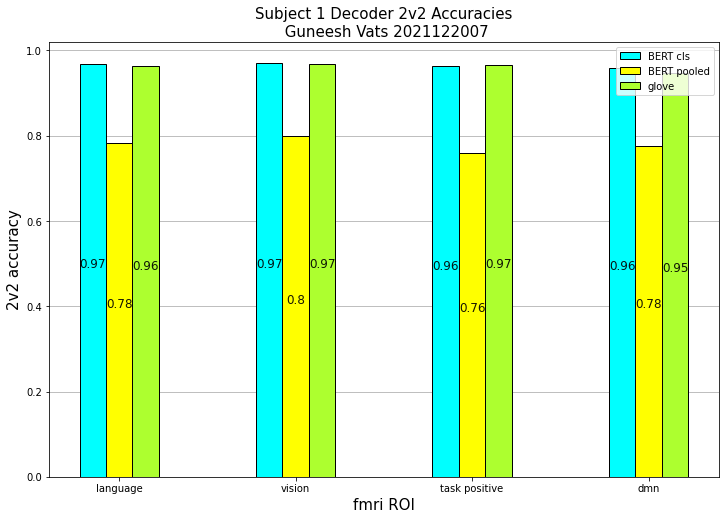

In [ ]:
xlabels = ['language','vision','task positive','dmn']
w = 0.15
bar1 = np.arange(len(xlabels))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(bar1, decoder_cls_subj1_2v2, w, label='BERT cls',edgecolor = 'black', color='aqua')
ax.bar(bar2, decoder_pooled_subj1_2v2, w, label='BERT pooled',edgecolor = 'black',color='yellow' )
ax.bar(bar3, decoder_glove_subj1_2v2, w, label='glove',edgecolor = 'black', color='greenyellow')
ax.set_xlabel("fmri ROI",fontsize=15)
ax.set_ylabel("2v2 accuracy",fontsize=15)
ax.set_title("Subject 1 Decoder 2v2 Accuracies\n Guneesh Vats 2021122007",fontsize=15)
ax.set_axisbelow(True)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_xticks(bar1+w, xlabels,fontsize=10)
ax.legend()

for bar in ax.patches:
  bar_value = round(bar.get_height(),2)
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value/2
  bar_color = 'black'
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, alpha=.91,
          size=12)

### Subject 2 2v2 Accuracies



In [ ]:
decoder_cls_subj2_2v2 = [decoder_cls_subj2_lang_2v2, decoder_cls_subj2_vis_2v2,decoder_cls_subj2_task_2v2,decoder_cls_subj2_dmn_2v2]
decoder_pooled_subj2_2v2 = [decoder_pooled_subj2_lang_2v2, decoder_pooled_subj2_vis_2v2,decoder_pooled_subj2_task_2v2,decoder_pooled_subj2_dmn_2v2]
decoder_glove_subj2_2v2 = [decoder_glove_subj2_lang_2v2, decoder_glove_subj2_vis_2v2,decoder_glove_subj2_task_2v2,decoder_glove_subj2_dmn_2v2]

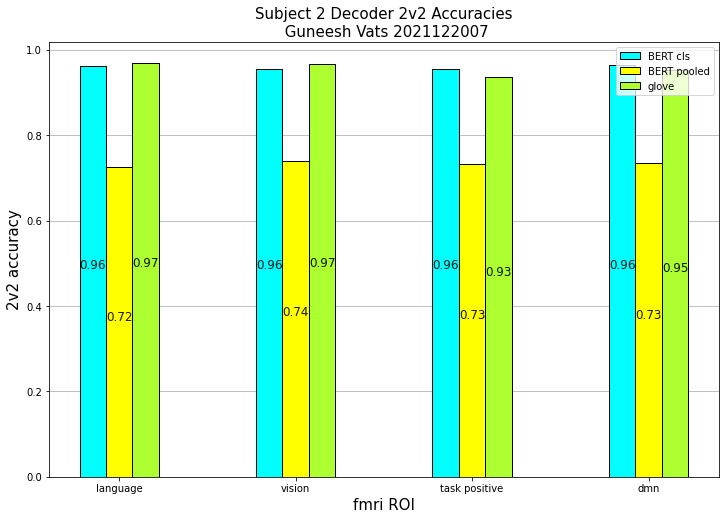

In [ ]:
xlabels = ['language','vision','task positive','dmn']
w = 0.15
bar1 = np.arange(len(xlabels))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(bar1, decoder_cls_subj2_2v2, w, label='BERT cls',edgecolor = 'black', color='aqua')
ax.bar(bar2, decoder_pooled_subj2_2v2, w, label='BERT pooled',edgecolor = 'black',color='yellow' )
ax.bar(bar3, decoder_glove_subj2_2v2, w, label='glove',edgecolor = 'black', color='greenyellow')
ax.set_xlabel("fmri ROI",fontsize=15)
ax.set_ylabel("2v2 accuracy",fontsize=15)
ax.set_title("Subject 2 Decoder 2v2 Accuracies\n Guneesh Vats 2021122007",fontsize=15)
ax.set_axisbelow(True)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_xticks(bar1+w, xlabels,fontsize=10)
ax.legend()

for bar in ax.patches:
  bar_value = round(bar.get_height(),2)
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value/2
  bar_color = 'black'
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, alpha=.91,
          size=12)

### Subject 1 Pearson's Correlation

In [ ]:
decoder_cls_subj1_pc = [decoder_cls_subj1_lang_pc[1][0], decoder_cls_subj1_vis_pc[1][0],decoder_cls_subj1_task_pc[1][0],decoder_cls_subj1_dmn_pc[1][0]]
decoder_pooled_subj1_pc = [decoder_pooled_subj1_lang_pc[1][0], decoder_pooled_subj1_vis_pc[1][0],decoder_pooled_subj1_task_pc[1][0],decoder_pooled_subj1_dmn_pc[1][0]]
decoder_glove_subj1_pc = [decoder_glove_subj1_lang_pc[1][0], decoder_glove_subj1_vis_pc[1][0],decoder_glove_subj1_task_pc[1][0],decoder_glove_subj1_dmn_pc[1][0]]

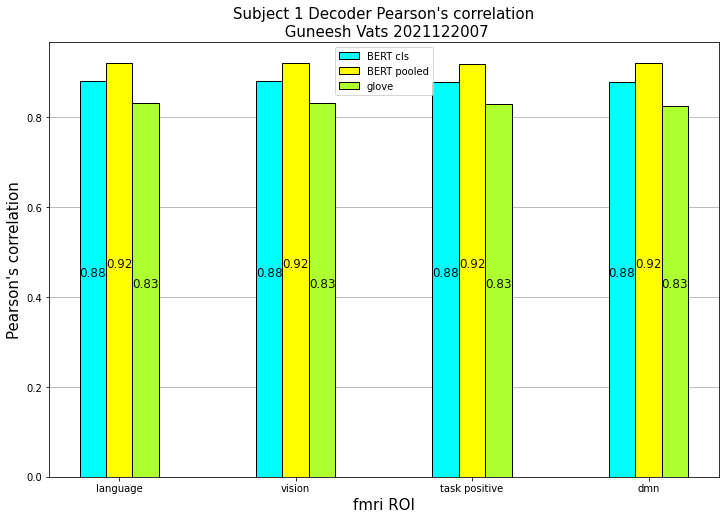

In [ ]:
xlabels = ['language','vision','task positive','dmn']
w = 0.15
bar1 = np.arange(len(xlabels))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(bar1, decoder_cls_subj1_pc, w, label='BERT cls',edgecolor = 'black', color='aqua')
ax.bar(bar2, decoder_pooled_subj1_pc, w, label='BERT pooled',edgecolor = 'black',color='yellow' )
ax.bar(bar3, decoder_glove_subj1_pc, w, label='glove',edgecolor = 'black', color='greenyellow')
ax.set_xlabel("fmri ROI",fontsize=15)
ax.set_ylabel("Pearson's correlation",fontsize=15)
ax.set_title("Subject 1 Decoder Pearson's correlation\n Guneesh Vats 2021122007",fontsize=15)
ax.set_axisbelow(True)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_xticks(bar1+w, xlabels,fontsize=10)
ax.legend()

for bar in ax.patches:
  bar_value = round(bar.get_height(),2)
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value/2
  bar_color = 'black'
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, alpha=.91,
          size=12)

### Subject 2 Pearson's Correlation

In [ ]:
decoder_cls_subj2_pc = [decoder_cls_subj2_lang_pc[1][0], decoder_cls_subj2_vis_pc[1][0],decoder_cls_subj2_task_pc[1][0],decoder_cls_subj2_dmn_pc[1][0]]
decoder_pooled_subj2_pc = [decoder_pooled_subj2_lang_pc[1][0], decoder_pooled_subj2_vis_pc[1][0],decoder_pooled_subj2_task_pc[1][0],decoder_pooled_subj2_dmn_pc[1][0]]
decoder_glove_subj2_pc = [decoder_glove_subj2_lang_pc[1][0], decoder_glove_subj2_vis_pc[1][0],decoder_glove_subj2_task_pc[1][0],decoder_glove_subj2_dmn_pc[1][0]]

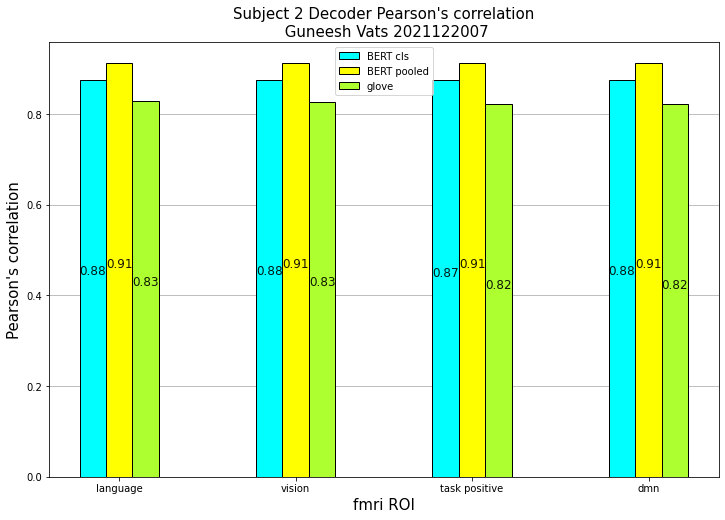

In [ ]:
xlabels = ['language','vision','task positive','dmn']
w = 0.15
bar1 = np.arange(len(xlabels))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(bar1, decoder_cls_subj2_pc, w, label='BERT cls',edgecolor = 'black', color='aqua')
ax.bar(bar2, decoder_pooled_subj2_pc, w, label='BERT pooled',edgecolor = 'black',color='yellow' )
ax.bar(bar3, decoder_glove_subj2_pc, w, label='glove',edgecolor = 'black', color='greenyellow')
ax.set_xlabel("fmri ROI",fontsize=15)
ax.set_ylabel("Pearson's correlation",fontsize=15)
ax.set_title("Subject 2 Decoder Pearson's correlation\n Guneesh Vats 2021122007",fontsize=15)
ax.set_axisbelow(True)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_xticks(bar1+w, xlabels,fontsize=10)
ax.legend()

for bar in ax.patches:
  bar_value = round(bar.get_height(),2)
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value/2
  bar_color = 'black'
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, alpha=.91,
          size=12)